In [1]:
import pandas as pd
from scipy import stats

## Question 1

A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

#### we use two sample two tail T test

- Ho: Diameter of cutlets are equal
- H1: Diameter of cutlets are not equal

In [2]:
df1 = pd.read_csv('Cutlets.csv')
df1.head(5)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
# use two sample test two tail
s,p = stats.ttest_ind(df1['Unit A'],df1['Unit B'])
print(f'statistics {s}')
print(f'p-value {p}\n')

statistics 0.7228688704678063
p-value 0.4722394724599501



In [6]:
if p < 0.05:
    print(f'reject null hypothesis\nfinal outcome: diameter of cutlets are unequal')
else:
    print(f'failed to reject null hypothesis\nfinal outcome: diameter of cutlets are equal')

failed to reject null hypothesis
final outcome: diameter of cutlets are equal


## Question 2

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

#### we use anova test

- Ho: all samples are equal
- H1: all samples are not equal

In [7]:
df2= pd.read_csv('LabTAT.csv')
df2.head(5)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [8]:
# use anova 
f,p = stats.f_oneway(df2.iloc[:,0],df2.iloc[:,1],df2.iloc[:,2],df2.iloc[:,3])
print(f'f- statistics {f}')
print(f'p-value {p}\n')

f- statistics 118.70421654401437
p-value 2.1156708949992414e-57



In [10]:
if p < 0.05:
    print('Reject null hypothesis \nfinal outcome:All samples are not equal \n')
else:
    print('Failed to Reject null hypothesis\nfinal outcome: All samples are equal')

Reject null hypothesis 
final outcome:All samples are not equal 



## Question 3

Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

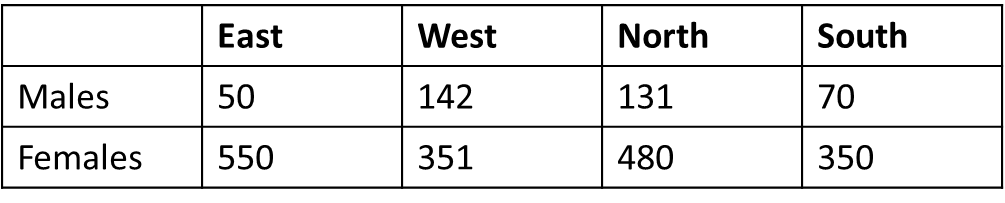

#### we use Chi square test

- Ho: All proportions are equal
- H1: All proportions are not equal

In [14]:
df3 = pd.read_csv('BuyerRatio.csv', index_col=0)
df3

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [15]:
 #use chi square
chi,p,dof,exp = stats.chi2_contingency(df3)
print(f'chi: {chi}')
print(f'p value: {p}')
print(f'dof: {dof}')
print(f'exp: {exp}\n')

chi: 1.595945538661058
p value: 0.6603094907091882
dof: 3
exp: [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]



In [18]:
if p < 0.05:
    print('Reject null hypothesis \nfinal outcome:All propotions are not equal \n')
else:
    print('Failed to Reject null hypothesis\nfinal outcome: All propotions are equal')

Failed to Reject null hypothesis
final outcome: All propotions are equal


## Question 4

TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


#### we use Chi square test

- Ho: defective percentage does not varies by centre
- H1: defective percentage varies by centre


In [19]:
df4 = pd.read_csv('Costomer+OrderForm.csv')
df4

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [20]:
cross_table = pd.crosstab(index=df4['Phillippines'], columns=[df4['India'], df4['Malta'], df4['Indonesia']])
chi,p,dof,exp = stats.chi2_contingency(cross_table)
print(f'chi: {chi}')
print(f'p value: {p}')
print(f'dof: {dof}')
print(f'exp: {exp}\n')

chi: 3.1001395592512266
p value: 0.6845505149379718
dof: 5
exp: [[1.93333333e-01 1.74000000e+00 8.70000000e-01 2.12666667e+00
  2.12666667e+00 2.19433333e+01]
 [1.80666667e+00 1.62600000e+01 8.13000000e+00 1.98733333e+01
  1.98733333e+01 2.05056667e+02]]



In [21]:
if p < 0.05:
    print('Reject null hypothesis \n final outcome: defective percentage varies by centre')
else:
    print('Failed to Reject null hypothesis\n final outcome: defective percentage does not varies by centre')

Failed to Reject null hypothesis
 final outcome: defective percentage does not varies by centre
